In [22]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [23]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [24]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_df["loan_status"].values

# Separate the X variable, the features
X = lending_df.drop("loan_status", axis=1)

In [25]:
# Review the y variable Series
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [26]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [27]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

In [51]:
# Create a function to create model, confusion matrix, and classification reports on original data using
# the model specified
def create_model(model_type):
    # Instantiate the specified model
    # Assign a random_state parameter of 1 to the model
    # Fit the model using training data
    if model_type == "LogisticRegression":
        model = LogisticRegression(random_state=1).fit(X_train, y_train)
    elif model_type == "DecisionTree":
        model = tree.DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
    elif model_type == "RandomForest":
        model = RandomForestClassifier(n_estimators=500, random_state=1).fit(X_train, y_train)

    # Make a prediction using the testing data
    predictions = model.predict(X_test)

    # Generate a confusion matrix for the model
    cm = confusion_matrix(y_test, predictions)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "High-Risk"]).plot()

    # Print the classification report for the model
    print(f"Classification Report:\n{classification_report(y_test, predictions)}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"Precision: {precision_score(y_test, predictions)}")
    print(f"Recall: {recall_score(y_test, predictions)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384

Accuracy: 0.9918489475856377
Precision: 0.8466165413533835
Recall: 0.9095315024232633


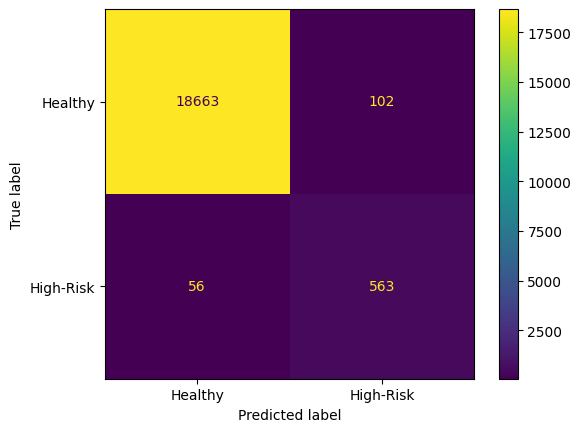

In [52]:
create_model("LogisticRegression")

### Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Overall, the logistic regression model predicts both healthy and high-risk loan labels very well, as seen by its 99% accuracy in the classification report. The model does have a lower precision versus its recall, which signifies that it provides more false-positives than false-negatives, which is better compared to the other way around.

---

## Create a Decision Tree Model with the Original Data

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18765
           1       0.84      0.85      0.85       619

    accuracy                           0.99     19384
   macro avg       0.92      0.92      0.92     19384
weighted avg       0.99      0.99      0.99     19384

Accuracy: 0.990249690466364
Precision: 0.8434504792332268
Recall: 0.8529886914378029


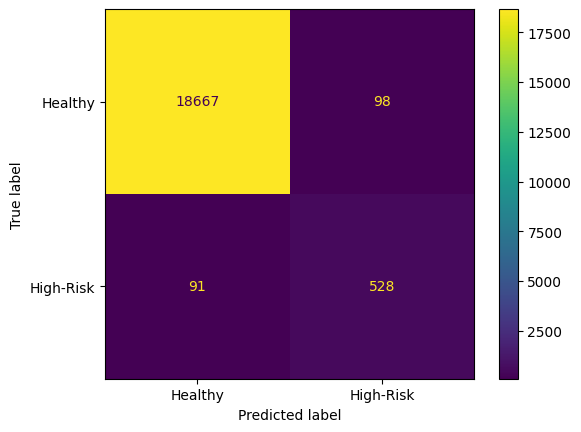

In [53]:
create_model("DecisionTree")

## Create a Random Forest Model with the Original Data

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.90      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.93     19384
weighted avg       0.99      0.99      0.99     19384

Accuracy: 0.991642591828312
Precision: 0.84779299847793
Recall: 0.8998384491114702


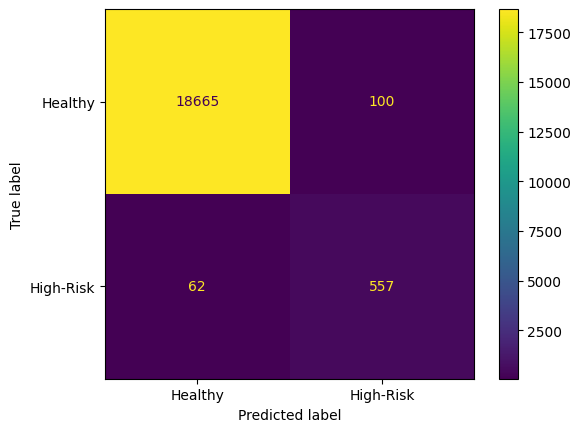

In [54]:
create_model("RandomForest")